# heart_disease tvae stacking

Training on heart_disease dataset using tvae model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "tvae"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [3]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-08T11:46:55.667834+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 40%|████      | 400/1000 [02:34<03:51,  2.59it/s]


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      60    1                4           120          246   
1      41    1                4           109          194   
2      63    0                3           130          224   
3      46    1                2           107          186   
4      60    1                4           153          245   
...   ...  ...              ...           ...          ...   
1185   58    1                4           152          221   
1186   61    1                3           137          294   
1187   64    1                4           115            0   
1188   44    1                2           121          238   
1189   45    0                4           139          232   

 

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-08T11:49:33.457646+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [04:43<08:46,  1.23it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   55    1                3           130          231   
457    61    1                3           120            0   
1738   43    1                2           110          232   
883    44    1                2           120          263   
2279   42    1                3           130          241   
...   ...  ...              ...           ...          ...   
1638   59    1                4           130          255   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   46    1                4           156          248   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            2             126                0   
457                     0            0              80                1   
1738               

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-08T11:54:18.418615+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 65%|██████▌   | 650/1000 [18:22<09:53,  1.70s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   55    1                4           150          252   
4227   44    1                4           151          255   
3135   42    1                4           111          236   
1554   55    1                4           138            0   
...   ...  ...              ...           ...          ...   
4426   58    1                4           139          224   
466    42    1                3           134          240   
3092   58    1                3           129          243   
3772   41    1                2           129          232   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    0            2             122                1   
4227               

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-08T12:12:42.772199+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [3:03:41<3:03:41, 22.04s/it]    


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   60    1                4           153          236   
3016   58    1                2           130            2   
5292   57    1                4           138          185   
7932   55    1                4           138           15   
4734   42    1                2           137          232   
...   ...  ...              ...           ...          ...   
5734   43    1                4           138          231   
5191   61    0                3           151          248   
5390   53    1                4           139          237   
860    62    0                4           140          268   
7270   40    1                3           140          196   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            0             116                1   
3016                    0            0             123                0   
5292               

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-08T15:16:27.254811+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▌    | 550/1000 [1:08:59<56:26,  7.53s/it]  


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    42    1                4           121          260   
1288    45    1                2           105          245   
18494   52    1                4           119          233   
15527   42    1                4           128          232   
12341   43    1                4           138          275   
...    ...  ...              ...           ...          ...   
11284   43    1                4           119          247   
11964   42    1                4           118            0   
5390    53    1                4           139          237   
860     62    0                4           140          268   
15795   43    1                2           119          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            0             160                1   
1288                     0            0             121                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T16:25:35.533317+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 95%|█████████▌| 950/1000 [4:01:47<12:43, 15.27s/it]  


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T20:27:36.635524+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 1000/1000 [3:36:40<00:00, 13.00s/it] 


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   53    1                1           151          226   
1510    44    0                2           119          248   
26995   67    1                4           149          236   
14320   58    1                4           138            0   
34943   58    1                4           110          244   
...    ...  ...              ...           ...          ...   
16850   41    1                2           109          228   
6265    60    1                4           138            7   
11284   43    1                4           119          247   
860     62    0                4           140          268   
15795   43    1                2           119          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             108                0   
1510                     0            1             107                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   40    1                2           107          232   
6191    61    0                3           129          227   
3687    59    1                4           138          241   
1440    54    1                4           129            0   
28826   59    1                3           137          239   
...    ...  ...              ...           ...          ...   
18040   42    1                4           110          234   
7455    54    1                4           120          252   
12474   43    1                3           129          244   
2050    43    0                3           129          246   
16985   43    1                2           129          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            0             157                0   
6191                     0            0             159                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Count of data_real
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011048,0.002776,0.988952,0.002776
1,pca_eigval_diff,u,0.072728,NaN,0.927272,NaN
2,pca_eigvec_ang,u,0.176735,NaN,0.943744,NaN
3,avg_cio,u,0.195522,0.117690,0.195522,0.117690
4,corr_mat_diff,u,0.831667,NaN,0.987399,NaN
5,mutual_inf_diff,u,0.981738,NaN,0.985125,NaN
6,ks_tvd_stat,u,0.092144,0.017266,0.907856,0.017266
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.024876,0.007483,0.975124,0.007483
9,avg_pMSE,u,0.008262,0.000384,0.966953,0.001535


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011830,0.002781,0.988170,0.002781
1,pca_eigval_diff,u,0.075016,NaN,0.924984,NaN
2,pca_eigvec_ang,u,0.164839,NaN,0.947530,NaN
3,avg_cio,u,0.289154,0.180257,0.289154,0.180257
4,corr_mat_diff,u,0.833907,NaN,0.987365,NaN
5,mutual_inf_diff,u,1.083842,NaN,0.983578,NaN
6,ks_tvd_stat,u,0.112359,0.018937,0.887641,0.018937
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.085411,0.053159,0.914589,0.053159
9,avg_pMSE,u,0.014027,0.000617,0.943893,0.002468


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.014399,0.002784,0.985601,0.002784
1,pca_eigval_diff,u,0.103639,NaN,0.896361,NaN
2,pca_eigvec_ang,u,0.262138,NaN,0.916559,NaN
3,avg_cio,u,0.264368,0.162815,0.264368,0.162815
4,corr_mat_diff,u,0.938112,NaN,0.985786,NaN
5,mutual_inf_diff,u,1.140434,NaN,0.982721,NaN
6,ks_tvd_stat,u,0.130286,0.020753,0.869714,0.020753
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.094082,0.054088,0.905918,0.054088
9,avg_pMSE,u,0.020919,0.001151,0.916323,0.004605


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.015706,0.002760,0.984294,0.002760
1,pca_eigval_diff,u,0.096289,NaN,0.903711,NaN
2,pca_eigvec_ang,u,0.128784,NaN,0.959007,NaN
3,avg_cio,u,0.253886,0.118364,0.253886,0.118364
4,corr_mat_diff,u,0.983675,NaN,0.985096,NaN
5,mutual_inf_diff,u,1.190550,NaN,0.981961,NaN
6,ks_tvd_stat,u,0.137506,0.020648,0.862494,0.020648
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.096840,0.054249,0.903160,0.054249
9,avg_pMSE,u,0.023526,0.001003,0.905898,0.004012


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018266,0.002803,0.981734,0.002803
1,pca_eigval_diff,u,0.094325,NaN,0.905675,NaN
2,pca_eigvec_ang,u,0.327915,NaN,0.895621,NaN
3,avg_cio,u,0.309935,0.178270,0.309935,0.178270
4,corr_mat_diff,u,0.966623,NaN,0.985354,NaN
5,mutual_inf_diff,u,1.183121,NaN,0.982074,NaN
6,ks_tvd_stat,u,0.132505,0.022369,0.867495,0.022369
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.092333,0.053339,0.907667,0.053339
9,avg_pMSE,u,0.024514,0.001135,0.901943,0.004538


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5 = S.evaluate(data_syn,target,"full_eval")
res_stack_v5

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017196,0.002766,0.982804,0.002766
1,pca_eigval_diff,u,0.143379,NaN,0.856621,NaN
2,pca_eigvec_ang,u,0.420458,NaN,0.866164,NaN
3,avg_cio,u,0.187664,0.128950,0.187664,0.128950
4,corr_mat_diff,u,1.233695,NaN,0.981308,NaN
5,mutual_inf_diff,u,1.263012,NaN,0.980863,NaN
6,ks_tvd_stat,u,0.130316,0.021943,0.869684,0.021943
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.093743,0.053713,0.906257,0.053713
9,avg_pMSE,u,0.023097,0.001133,0.907611,0.004531


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.019009,0.002775,0.980991,0.002775
1,pca_eigval_diff,u,0.140016,NaN,0.859984,NaN
2,pca_eigvec_ang,u,0.477349,NaN,0.848055,NaN
3,avg_cio,u,0.426240,0.185712,0.426240,0.185712
4,corr_mat_diff,u,1.214266,NaN,0.981602,NaN
5,mutual_inf_diff,u,1.258703,NaN,0.980929,NaN
6,ks_tvd_stat,u,0.144571,0.020732,0.855429,0.020732
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.101185,0.053642,0.898815,0.053642
9,avg_pMSE,u,0.032022,0.000841,0.871911,0.003363


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.023109,0.450490,0.0,0.127731
res_stack_v1,0.043067,0.457143,0.0,0.299160
res_stack_v2,0.027311,0.441737,0.0,0.092437
res_stack_v3,0.022059,0.445098,0.0,0.117647
res_stack_v4,0.030462,0.444398,0.0,0.139496
res_stack_v5,0.021008,0.433964,0.0,0.075630
res_stack_synth_only,0.031513,0.456092,0.0,0.112605


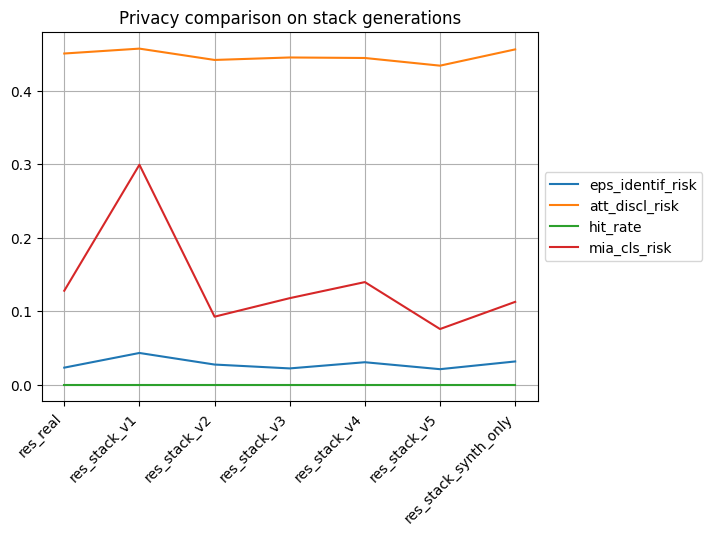

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,5.294464
res_stack_v1,4.172801
res_stack_v2,5.239255
res_stack_v3,5.270573
res_stack_v4,5.116096
res_stack_v5,5.522708
res_stack_synth_only,4.807783


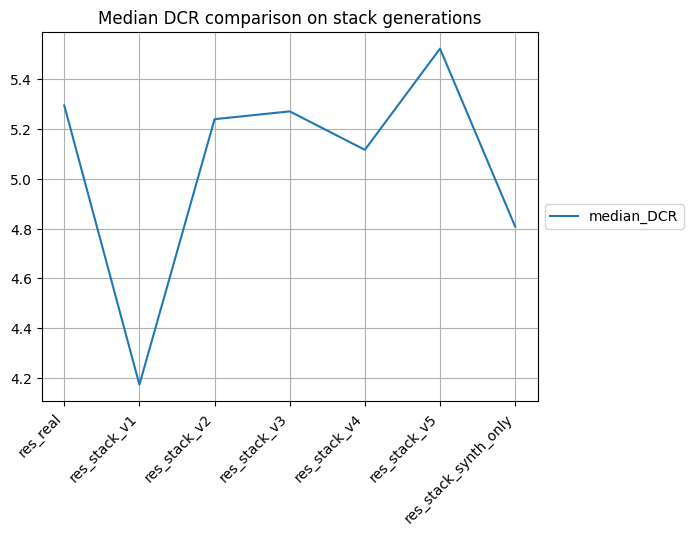

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.011048,0.072728,0.176735
res_stack_v1,0.011830,0.075016,0.164839
res_stack_v2,0.014399,0.103639,0.262138
res_stack_v3,0.015706,0.096289,0.128784
res_stack_v4,0.018266,0.094325,0.327915
res_stack_v5,0.017196,0.143379,0.420458
res_stack_synth_only,0.019009,0.140016,0.477349


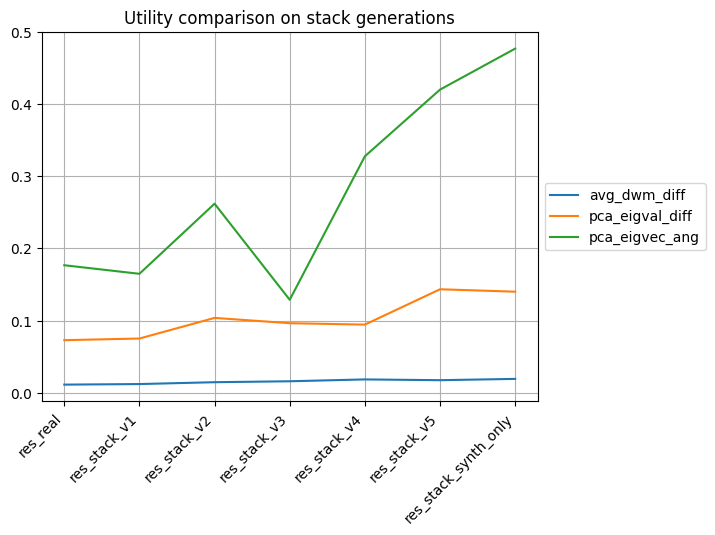

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.831667,0.981738
res_stack_v1,0.833907,1.083842
res_stack_v2,0.938112,1.140434
res_stack_v3,0.983675,1.190550
res_stack_v4,0.966623,1.183121
res_stack_v5,1.233695,1.263012
res_stack_synth_only,1.214266,1.258703


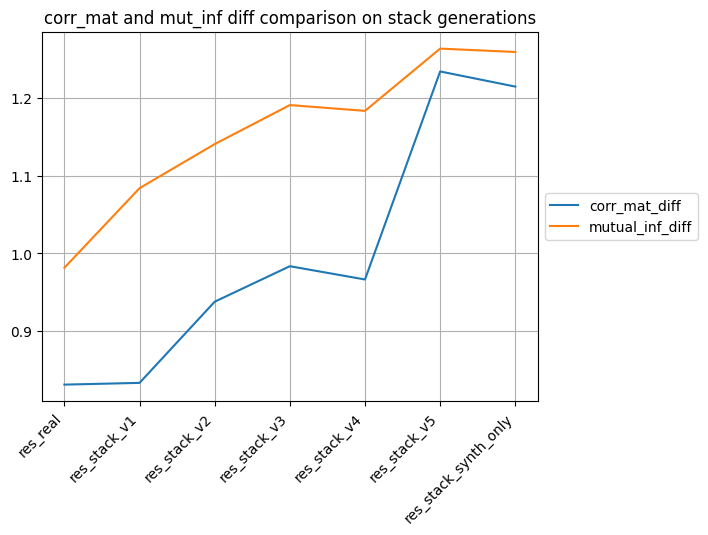

In [24]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.011048,0.072728,0.176735,0.195522,0.831667,0.981738,0.092144,0.833333,0.024876,0.008262,...,0.001236,0.923214,-0.138200,0.099580,0.070378,0.003435,0.0,0.023109,0.127731,0.450490
res_stack_v1,0.011830,0.075016,0.164839,0.289154,0.833907,1.083842,0.112359,0.833333,0.085411,0.014027,...,-0.001627,0.890756,-0.190966,0.113484,0.052521,0.008397,0.0,0.043067,0.299160,0.457143
res_stack_v2,0.014399,0.103639,0.262138,0.264368,0.938112,1.140434,0.130286,0.916667,0.094082,0.020919,...,0.009460,0.928992,-0.096008,0.133442,0.072479,0.015649,0.0,0.027311,0.092437,0.441737
res_stack_v3,0.015706,0.096289,0.128784,0.253886,0.983675,1.190550,0.137506,1.000000,0.096840,0.023526,...,-0.003050,0.932143,-0.117437,0.197477,0.097689,0.014340,0.0,0.022059,0.117647,0.445098
res_stack_v4,0.018266,0.094325,0.327915,0.309935,0.966623,1.183121,0.132505,0.833333,0.092333,0.024514,...,-0.013770,0.926050,-0.120378,0.161476,0.089286,0.004962,0.0,0.030462,0.139496,0.444398
res_stack_v5,0.017196,0.143379,0.420458,0.187664,1.233695,1.263012,0.130316,0.833333,0.093743,0.023097,...,-0.004322,0.936029,-0.093102,0.165216,0.101891,0.000872,0.0,0.021008,0.075630,0.433964
res_stack_synth_only,0.019009,0.140016,0.477349,0.426240,1.214266,1.258703,0.144571,0.916667,0.101185,0.032022,...,0.001105,0.922479,-0.091387,0.113683,0.069328,0.046456,0.0,0.031513,0.112605,0.456092


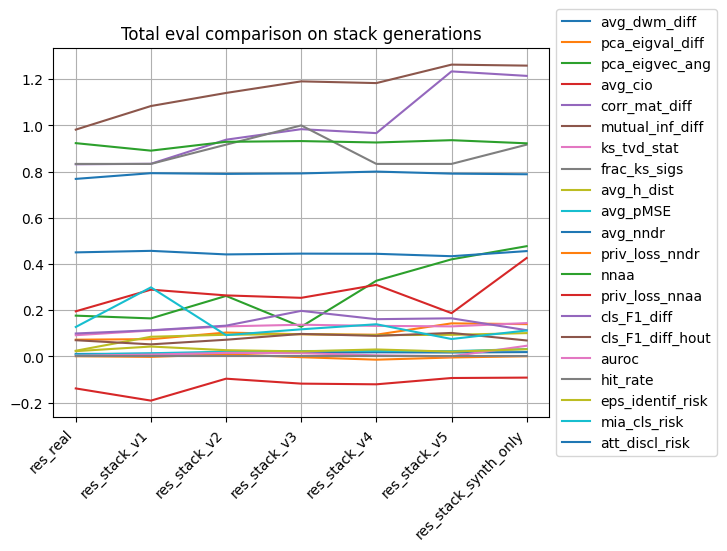

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.782000,0.878463
1,res_stack_v1,0.783458,0.850102
2,res_stack_v2,0.761152,0.890396
3,res_stack_v3,0.749847,0.885854
4,res_stack_v4,0.765885,0.881450
5,res_stack_v5,0.750117,0.895403
6,res_stack_synth_only,0.759667,0.886972


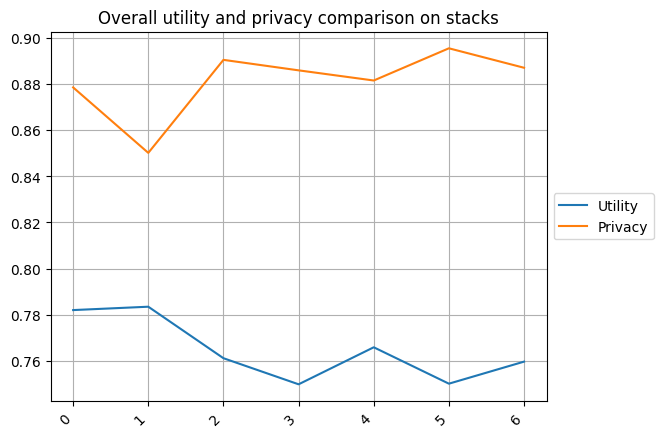

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()